In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


2(c)

In [2]:
x0=np.random.normal(0,1)

<IPython.core.display.Javascript object>


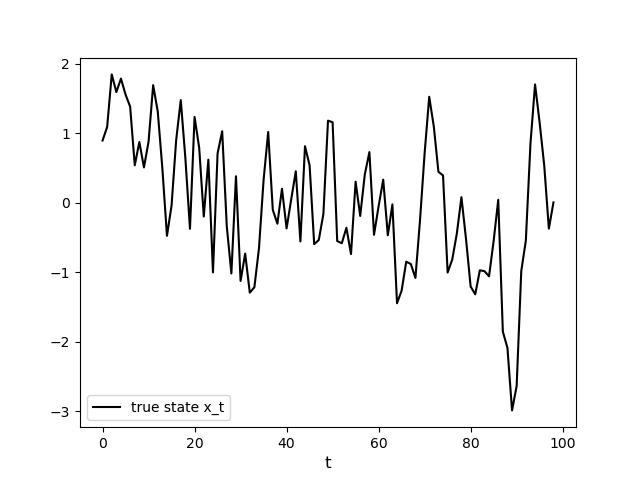

In [3]:
def process(alpha,x0,q,T):
    # One dimensional process model i.e. the dimension of X is 1
    # N+1 is the number of elements in the time series, including the background
    x=np.zeros(T+1)
    x[0]=x0 # x0 is one dimension
    for i in range(1,T+1):
        delta=np.random.normal(0,q)
        x[i]=alpha*x[i-1]+delta
    return x
#Find and plot states
T=100
q=math.sqrt(0.5) # standard deviation on process
alpha=0.7
x=process(alpha,x0,q,T)
figure(1)
clf()
state,=plt.plot(x[1:T],'k',markersize=4)
plt.legend([state], ['true state x_t'])
xlabel('t', fontsize=12)
show()

2(d)

<IPython.core.display.Javascript object>


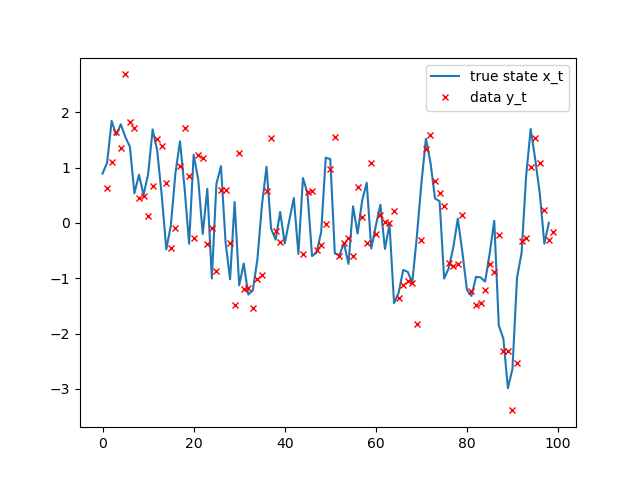

In [4]:
def data(x,r,T):
    y=np.zeros(T+1) # There is no data y[0]
    for i in range(1,T+1):
        eps=np.random.normal(0,r)
        y[i]=x[i]+eps
        #if np.logical_or(np.logical_and(T1 <= i, i <= T2),np.logical_and(T3 <= i, i <= T4)):
         
    return y
# Find and plot data
r=math.sqrt(0.1) # standard deviation on data
y=data(x,r,T)
T1=40
T2=43
T3=80
T4=83
figure(2)
state,=plt.plot(x[1:T],markersize=4)
# There is no data betwee T1 and T2, and T3 and T4 so don't plot y at those points
data1,=plt.plot(np.arange(1,T1),y[1:T1],'rx',markersize=4)
data2,=plt.plot(np.arange(T2+1,T3),y[T2+1:T3],'rx',markersize=4)
data3,=plt.plot(np.arange(T3+1,T),y[T3+1:T],'rx',markersize=4)
plt.legend([state,data1,data2,data3], ['true state x_t','data y_t'])
show()


2(e)

In [5]:
def kalman(sig,mu,r2,q2,alpha,y,T,T1,T2,T3,T4):
    forcast=np.zeros(T+1)
    forcast_u=np.zeros(T+1)
    gain=np.zeros(T+1)
    mu_new=np.zeros(T+1)
    sig_new=np.zeros(T+1)
    mu_old=alpha*mu
    sig_old=q2+alpha*sig*alpha
    for i in range(1,T+1):
        forcast[i]=mu_old
        forcast_u[i]=sig_old
        h=1
        if np.logical_or(np.logical_and(T1 <= i, i <= T2),np.logical_and(T3 <= i, i <= T4)):
            h=0
            y[i]=0 #This makes mu_new[i]=mu_old
        gain[i]=sig_old*h*(h*sig_old*h+r2)**(-1)
        mu_new[i]=mu_old+gain[i]*(y[i]-h*mu_old) # filtering estimate
        sig_new[i]=(1-gain[i]*h)*sig_old  #filtering uncertainty
        mu_old=alpha*mu_new[i]
        sig_old=q2+alpha**2*sig_new[i]
    return mu_new, sig_new, gain, forcast, forcast_u

In [6]:
mu_new, sig_new, gain, forcast, forcast_u=kalman(1,0,r**2,q**2,alpha,y,T,T1,T2,T3,T4)

<IPython.core.display.Javascript object>


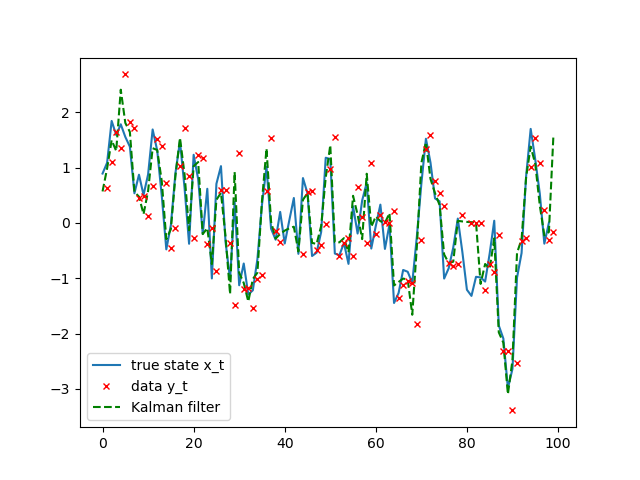

In [8]:
figure(3)
state,=plt.plot(x[1:T],markersize=4)
kfilter,=plt.plot(mu_new[1:T+1],'--g',markersize=4)
# There is no data betwee T1 and T2, and T3 and T4 so don't plot y at those points
data1,=plt.plot(np.arange(1,T1),y[1:T1],'rx',markersize=4)
data2,=plt.plot(np.arange(T2+1,T3),y[T2+1:T3],'rx',markersize=4)
data3,=plt.plot(np.arange(T3+1,T),y[T3+1:T],'rx',markersize=4)
plt.legend([state,data1,kfilter,data2,data3], ['true state x_t','data y_t','Kalman filter'])
show()

2(f) 

<IPython.core.display.Javascript object>


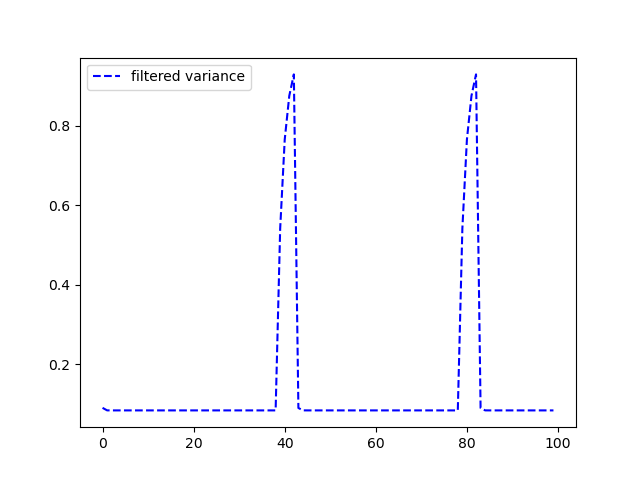

In [9]:
figure(4)
fvar,=plt.plot(sig_new[1:T+1],'--b',markersize=4)
plt.legend([fvar], ['filtered variance'])
show()